BUSINESS UNDERSTANDING

The goal of this activity is to create a decision tree classifier to predict whether a tumor is
benign or malignant based on medical data. This prediction can assist healthcare
professionals in making informed decisions.

DATA UNDERSTANDING
We will use the Breast Cancer dataset, a widely-used dataset for binary classification tasks. This dataset includes features extracted from digitized images of fine needle aspirate
(FNA) of breast masses.

1. **mean radius**: Mean of distances from the center to points on the perimeter.
2. **mean texture**: Standard deviation of gray-scale values.
3. **mean perimeter**: Mean size of the tumor perimeter.
4. **mean area**: Mean size of the tumor area.
5. **mean smoothness**: Mean of local variation in radius lengths.
6. **mean compactness**: Mean of perimeter^2 / area - 1.0.
7. **mean concavity**: Mean of severity of concave portions of the contour.
8. **mean concave points**: Mean of the number of concave portions of the contour.
9. **mean symmetry**: Mean of symmetry.

10. **mean fractal dimension**: Mean of "coastline approximation" - 1.
11. **... (additional features include similar metrics for standard error and worst-case
values of these properties).**
12. **target**: 0 for benign, 1 for malignant.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from google.colab import files

# load the dataset
cancer = load_breast_cancer()
data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target

In [2]:
# Display dataset summary
print("Dataset Summary:")
print(data.info())
print("\nFirst Five Rows of Data:")
print(data.head())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothnes

DATA PREPARATION

In this step, we get the data ready for analysis. First, we split the dataset into features (the columns that will help us make predictions) and the target (the column that indicates whether the tumor is benign or malignant). Then, we divide the data into two subsets: one for training the model (training dataset) and another for evaluating the model (scoring dataset).

In [3]:
# Split the data into features and target
X = data.drop(columns=['target'])
y = data['target']
# Split into training and scoring datasets
X_train, X_score, y_train, y_score = train_test_split(X, y, test_size=0.3, random_state=42)
# Save training and scoring datasets as CSV files
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
train_data.to_csv('training_data.csv', index=False)
scoring_data = pd.concat([X_score, y_score.reset_index(drop=True)], axis=1)
scoring_data.to_csv('scoring_data.csv', index=False)
print("Training and scoring datasets prepared and saved as CSV files.")

Training and scoring datasets prepared and saved as CSV files.


DATA MODELLING

Now we build the decision tree model. A decision tree works by splitting the data into branches based on feature values, eventually leading to predictions at the leaf nodes. In this case, the model learns to separate benign and malignant tumors by analyzing patterns in the training data.

In [4]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
# Train the classifier
clf.fit(X_train, y_train)
print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


EVALUATION

After training the model, we need to check how well it performs on data it hasn’t seen before—the scoring dataset. We use the model to predict whether the tumors in the scoring dataset are benign or malignant and compare these predictions to the actual labels.

In [5]:
# Make predictions
y_pred = clf.predict(X_score)
# Evaluate predictions
accuracy = accuracy_score(y_score, y_pred)
print(f"Accuracy on Scoring Dataset: {accuracy:.2f}")
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_score, y_pred))

Accuracy on Scoring Dataset: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



DEPLOYMENT

The final step is to make the model and results accessible for real-world use. First, we visualize the decision tree to understand how it makes decisions. The tree shows which features are most important and the thresholds used to split the data, making the model transparent and interpretable.

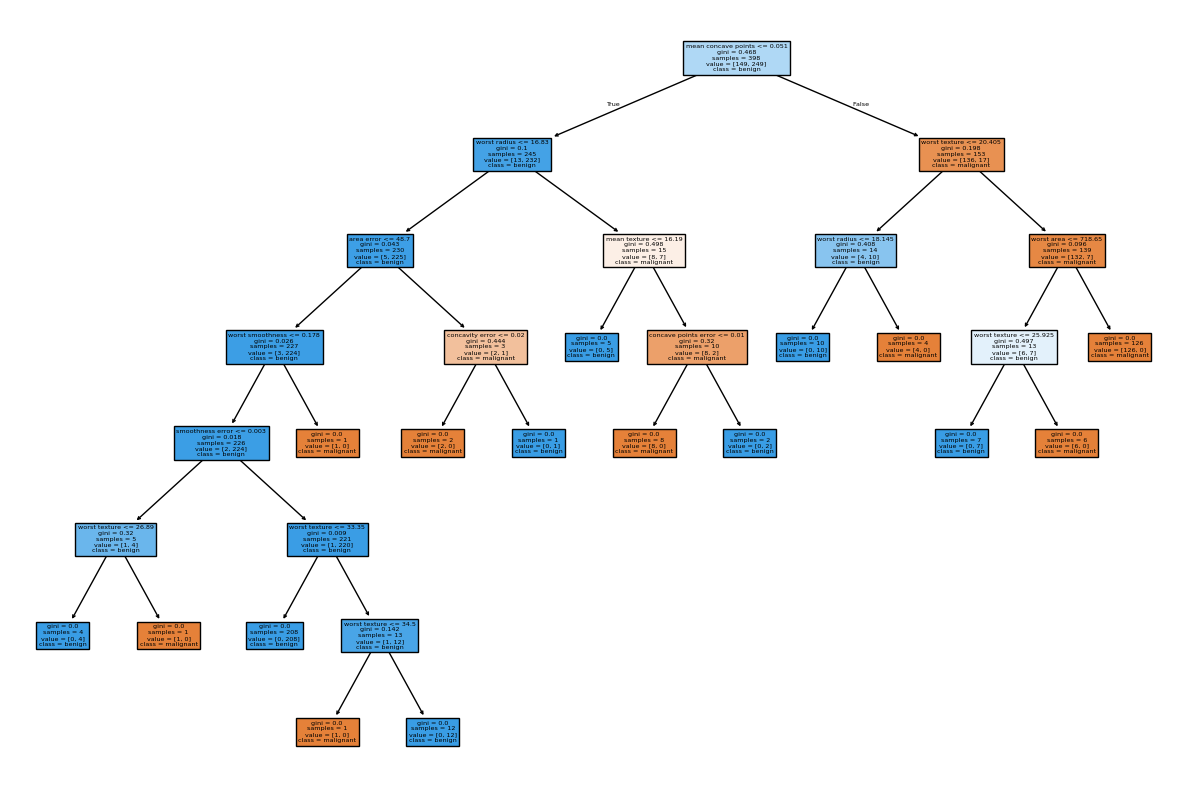

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X_train.columns, class_names=cancer.target_names, filled=True)
plt.show()
# Download datasets
files.download('training_data.csv')
files.download('scoring_data.csv')

DATA EVALUATION

Now we can analyze the model’s predictions and understand how it classifies tumors as malignant or benign. This insight can assist healthcare professionals in making informed decisions by leveraging the model's predictions to guide the next steps in a patient’s treatment plan.